<a href="https://colab.research.google.com/github/LeoFernanndes/portfolio/blob/master/MachineFailuresEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Failures Dataset

Resumo: de todas as variáveis apresentadas no problema, nos parece plausível que ao menso 90% da explicabilidade da ocorrência de falhas em operação sejam suportados por temperatura, humidade e tempo decorrido desde a última falha.

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


raw_data_url = "https://raw.githubusercontent.com/LeoFernanndes/datasets/master/dataset-machine_failures.csv"
raw_data = pd.read_csv(raw_data_url)
raw_data

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,﻿Date.year,﻿Date.month,﻿Date.day-of-month,﻿Date.day-of-week,﻿Date.hour,﻿Date.minute,﻿Date.second
0,2016-01-01 00:00:00,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No,2016,1,1,5,0,0,0
1,2016-01-01 01:00:00,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No,2016,1,1,5,1,0,0
2,2016-01-01 02:00:00,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No,2016,1,1,5,2,0,0
3,2016-01-01 03:00:00,63,80,Operator1,550,1,1,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93,No,2016,1,1,5,3,0,0
4,2016-01-01 04:00:00,65,81,Operator1,1928,1,2,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94,No,2016,1,1,5,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2016-12-31 19:00:00,66,79,Operator8,937,0,2,1875,1719,219,748,1901,819,546,901,1512,1477,537,410,7,No,2016,12,31,6,19,0,0
8780,2016-12-31 20:00:00,60,77,Operator8,379,3,0,814,1990,1606,1346,962,875,1067,608,251,1476,522,943,8,No,2016,12,31,6,20,0,0
8781,2016-12-31 21:00:00,61,77,Operator8,595,3,1,1659,1134,1314,907,1119,1623,272,1149,1951,1835,1554,200,9,No,2016,12,31,6,21,0,0
8782,2016-12-31 22:00:00,72,81,Operator8,1038,3,2,254,1400,564,216,1011,1909,502,470,1331,1696,229,1192,10,No,2016,12,31,6,22,0,0


In [42]:
PLOT_SIZE = (15,10)
AXIS_FONTSIZE = 15
FONTSIZE = 20
TITLE_FONTSIZE = 25

In [3]:
raw_data.columns

Index(['Date', 'Temperature', 'Humidity', 'Operator', 'Measure1', 'Measure2',
       'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8',
       'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13',
       'Measure14', 'Measure15', 'Hours Since Previous Failure', 'Failure',
       '﻿Date.year', '﻿Date.month', '﻿Date.day-of-month', '﻿Date.day-of-week',
       '﻿Date.hour', '﻿Date.minute', '﻿Date.second'],
      dtype='object')

### Valores nulos

In [5]:
raw_data.isnull().sum()

Date                            0
Temperature                     0
Humidity                        0
Operator                        0
Measure1                        0
Measure2                        0
Measure3                        0
Measure4                        0
Measure5                        0
Measure6                        0
Measure7                        0
Measure8                        0
Measure9                        0
Measure10                       0
Measure11                       0
Measure12                       0
Measure13                       0
Measure14                       0
Measure15                       0
Hours Since Previous Failure    0
Failure                         0
﻿Date.year                      0
﻿Date.month                     0
﻿Date.day-of-month              0
﻿Date.day-of-week               0
﻿Date.hour                      0
﻿Date.minute                    0
﻿Date.second                    0
dtype: int64

### Proporção de falhas

In [6]:
df = raw_data.copy()
df['Day'] = [d.date() for d in pd.to_datetime(df['Date'])]
df['Week'] = [d.isocalendar()[1] for d in df['Day']]
df['Failure'].value_counts()
df['Failure'] = df['Failure'].map({"No": 0, "Yes": 1})
df['Failure'].mean()

0.009221311475409836

In [7]:
df['Failure'].value_counts()

0    8703
1      81
Name: Failure, dtype: int64

### Estatística descritiva


In [8]:
df.describe()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,﻿Date.year,﻿Date.month,﻿Date.day-of-month,﻿Date.day-of-week,﻿Date.hour,﻿Date.minute,﻿Date.second,Week
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.0,8784.000000,8784.000000,8784.000000,8784.000000,8784.0,8784.0,8784.000000
mean,64.026412,83.337090,1090.900387,1.489868,0.999203,1071.629895,1075.822860,1076.023793,1086.897086,1077.277209,1082.014572,1082.403005,1088.719148,1088.329349,1076.755806,1088.307377,1082.392304,217.341872,0.009221,2016.0,6.513661,15.756831,4.008197,11.500000,0.0,0.0,26.647541
std,2.868833,4.836256,537.097769,1.115605,0.816473,536.518466,533.158826,534.004966,538.195156,537.187671,532.983115,537.582829,534.995992,533.299486,535.111353,537.264847,537.527604,151.751750,0.095589,0.0,3.451430,8.812031,1.998047,6.922581,0.0,0.0,15.099762
min,5.000000,65.000000,155.000000,0.000000,0.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,1.000000,0.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,1.000000
25%,62.000000,80.000000,629.000000,0.000000,0.000000,608.750000,606.000000,623.000000,621.000000,612.000000,631.000000,619.000000,627.000000,627.000000,609.000000,617.000000,614.000000,90.000000,0.000000,2016.0,4.000000,8.000000,2.000000,5.750000,0.0,0.0,14.000000
50%,64.000000,83.000000,1096.000000,1.000000,1.000000,1058.000000,1077.000000,1072.000000,1089.000000,1074.000000,1078.000000,1080.000000,1093.000000,1082.000000,1067.000000,1088.500000,1076.000000,195.000000,0.000000,2016.0,7.000000,16.000000,4.000000,11.500000,0.0,0.0,27.000000
75%,66.000000,87.000000,1555.000000,2.000000,2.000000,1533.000000,1541.000000,1537.000000,1558.000000,1541.000000,1532.000000,1547.000000,1550.000000,1552.000000,1539.000000,1560.000000,1550.000000,324.000000,0.000000,2016.0,10.000000,23.000000,6.000000,17.250000,0.0,0.0,40.000000
max,78.000000,122.000000,2011.000000,3.000000,2.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,666.000000,1.000000,2016.0,12.000000,31.000000,7.000000,23.000000,0.0,0.0,53.000000


## Plotagem e análises mais específicas

### Temperatura x humidade x falha

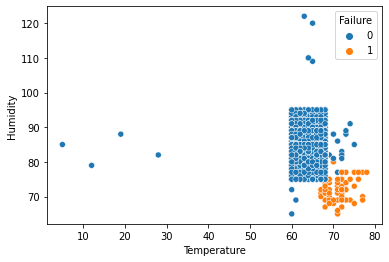

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x='Temperature', y='Humidity', data=df, hue='Failure')
plt.show()

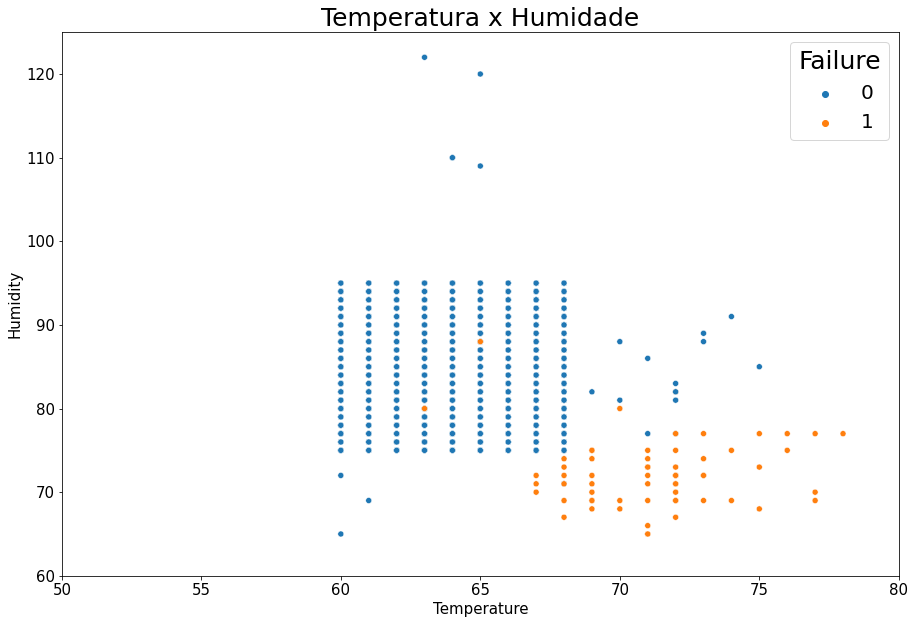

In [48]:
fig, ax = plt.subplots(figsize=PLOT_SIZE)
sns.scatterplot(x='Temperature', y='Humidity', data=df, hue='Failure')
# axis config
plt.xlim(50, 80)
plt.xlabel("Temperature", fontdict={"fontsize": AXIS_FONTSIZE})
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.ylim(60, 125)
plt.ylabel("Humidity", fontdict={"fontsize": AXIS_FONTSIZE})
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.legend(title="Failure", fontsize=FONTSIZE, title_fontsize=TITLE_FONTSIZE)
plt.title('Temperatura x Humidade', fontdict={'fontsize': 25})
plt.show()

Como imaginávamos, essas duas variáveis possuem um poder de explicabilidade muito grande sobre a ocorrência de falhas.
Com a separação natural dada por temperatura e humidade podemos entender que um modelo linear com 3 ou 4 variáveis já deve ser o suficiente pra uma boa previsão.
Um detalhe que chama a atenção são os registros de humidade acima de 100, o que pode indicar que a unidade de medida não é a porentagem como imaginamos num primeiro momento ou que de fato esses são registros inválidos. Na segunda opção, seria interessante remover os registros comprometidos.

### Outras variáveis

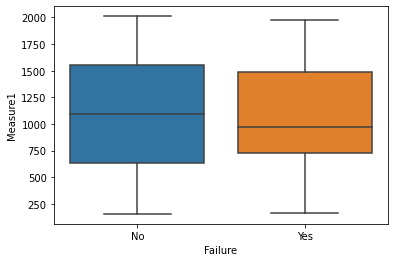

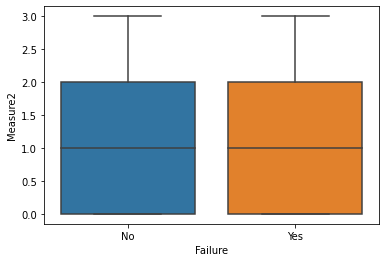

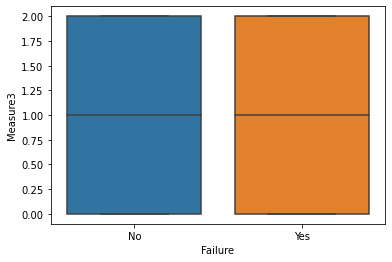

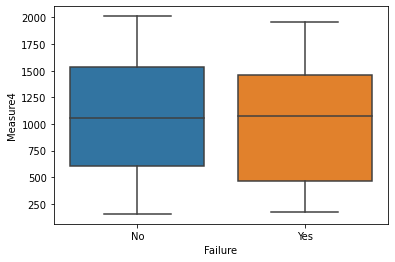

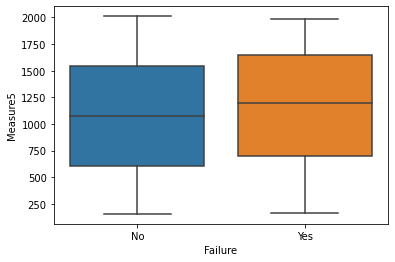

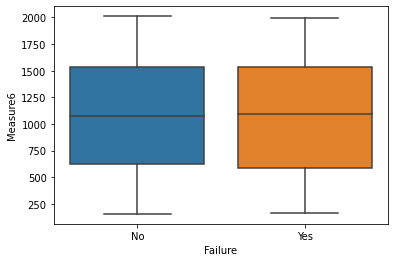

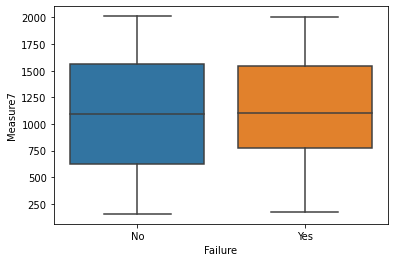

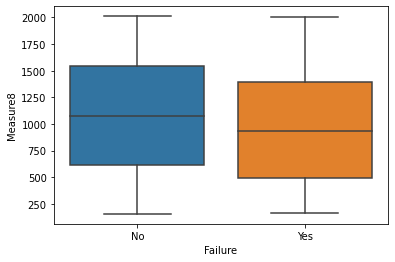

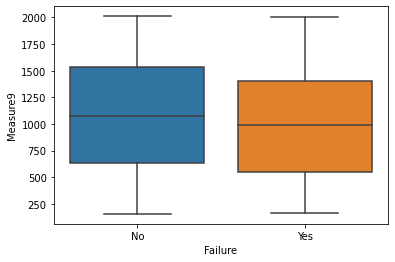

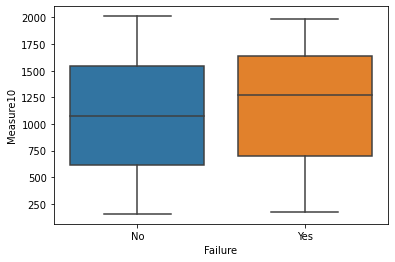

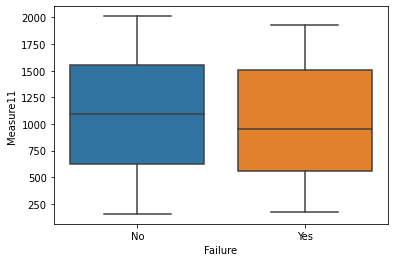

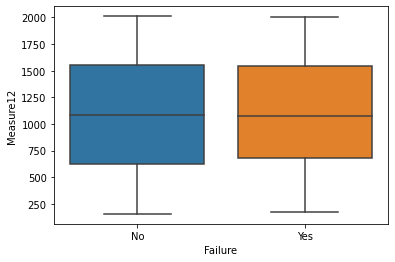

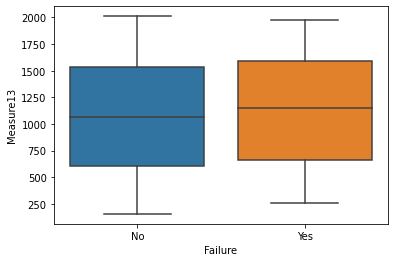

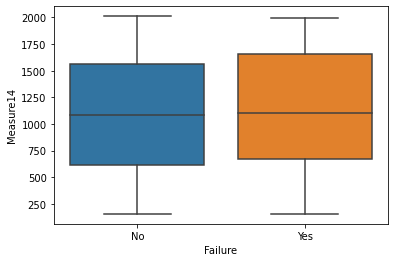

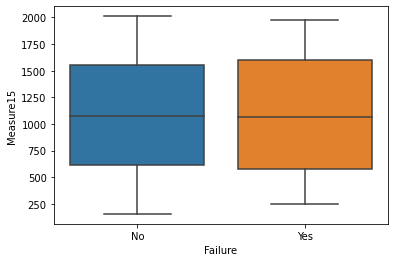

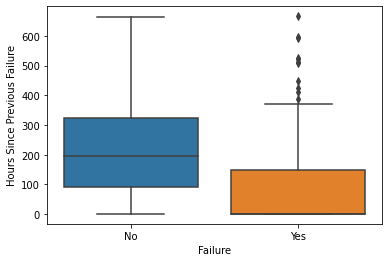

In [10]:
box_plot_features = ['Measure1', 'Measure2', 'Measure3', 'Measure4',
                     'Measure5', 'Measure6', 'Measure7', 'Measure8',
                     'Measure9', 'Measure10', 'Measure11', 'Measure12',
                     'Measure13', 'Measure14', 'Measure15',
                     'Hours Since Previous Failure']

for feature in box_plot_features:
    sns.boxplot(x='Failure', y=feature, data=raw_data, orient='v')
    plt.show()
    print()

De todas as medidas, tomadas individualmente em uma primeira análise, a uníca que apresenta um comportamento interessante é "Hours since previous failure".

### Hours since previous failure

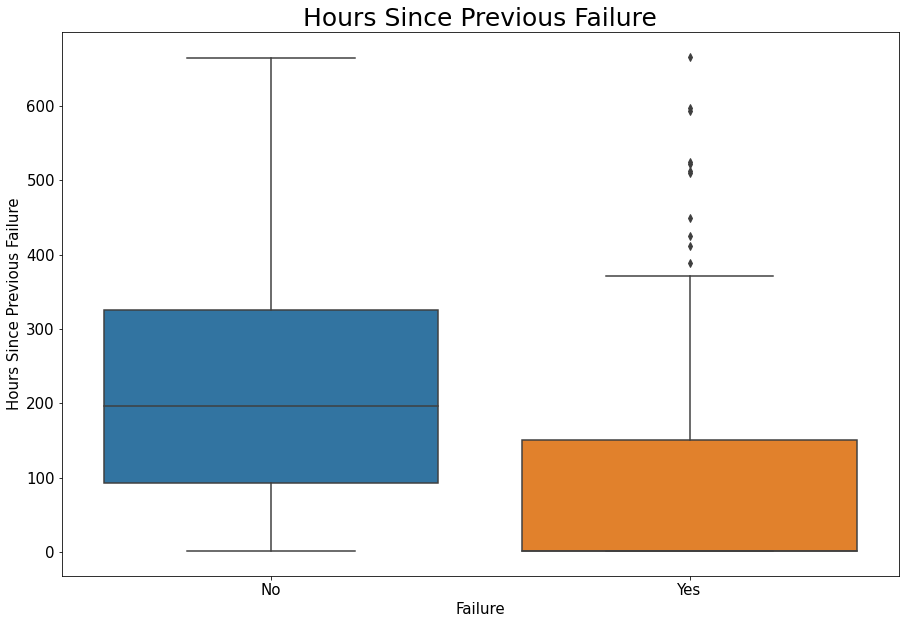

In [50]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x='Failure', y='Hours Since Previous Failure', data=raw_data, orient='v')

plt.xlabel("Failure", fontdict={"fontsize": AXIS_FONTSIZE})
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.ylabel("Hours Since Previous Failure", fontdict={"fontsize": AXIS_FONTSIZE})
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.title('Hours Since Previous Failure', fontdict={'fontsize': 25})
plt.show()

In [11]:
df.groupby(by='Failure').median()['Hours Since Previous Failure']

Failure
0    196
1      1
Name: Hours Since Previous Failure, dtype: int64

Não sabemos ao certo o que caracteriza uma falha, mas estranhamente há uma tendência forte de uma falha ter alguma relação de causalidade com a falha subsequente considerando que perto de 60% dos eventos negativos ocorrem menos de uma hora depois de outro na mesma máquina. Pode ser necessário investigar os proessos associados às manutenções corretivas.

### Date

In [14]:
df['Day'].value_counts().value_counts() # 24 medicoes por dia 

24    366
Name: Day, dtype: int64

Com 24 medições por dia, o dataset está perfeitamente distribuido no tempo apesar de não termos o número de máquinas diferentes nem informações que comprovem que adistribuição entre as máquinas seja igualmente confiável.

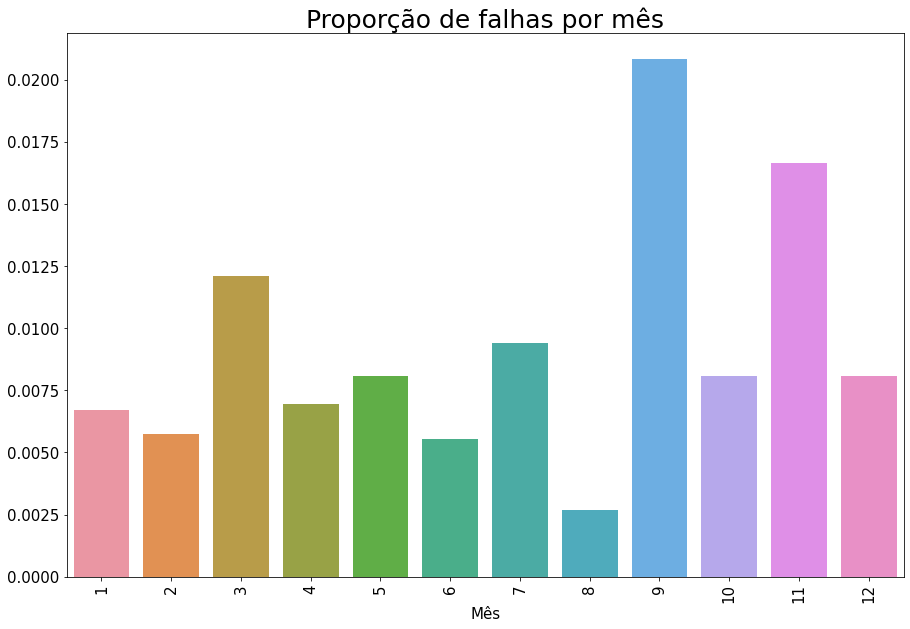

In [53]:
grouped_feature = df.groupby(by='﻿Date.month').mean()['Failure']
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=grouped_feature.index, y=grouped_feature.values)

plt.xlabel("Mês", fontdict={"fontsize": AXIS_FONTSIZE})
plt.xticks(rotation=90, fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.title('Proporção de falhas por mês', fontdict={'fontsize': 25})
plt.show()

Parece haver uma alta estranha entre os valores de junho e setembro. Podeser interessante buscar dados que verifiquem algum tipo de falta de treinamento entre os operadores ou contratações recentes. Como vamos ver mais a frente, todos os operadores presentes no dataset trabalharam de janeiro a dezembro, então a questão de mal uso aparenta ser seguramente descartável

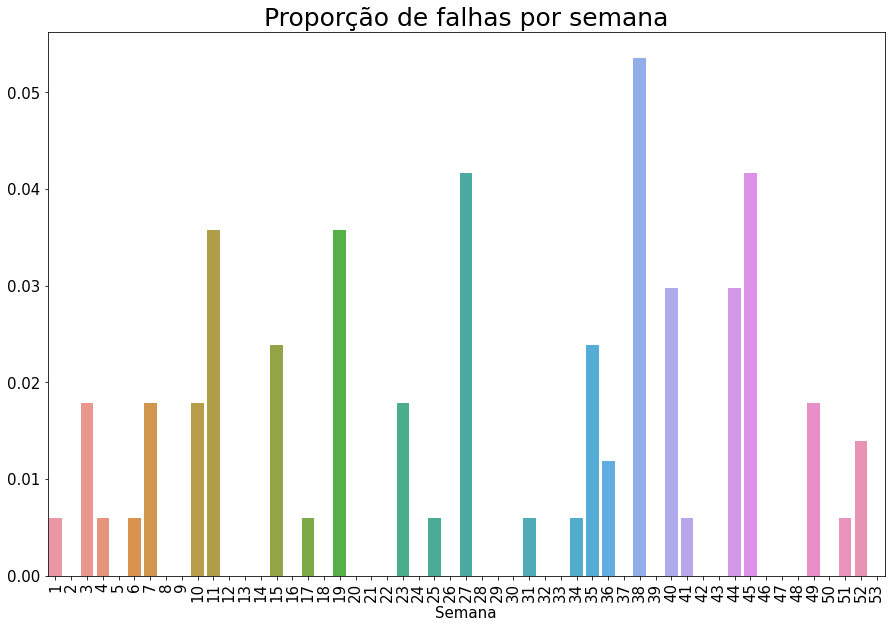

In [54]:
grouped_feature = df.groupby(by='Week').mean()['Failure']
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=grouped_feature.index, y=grouped_feature.values)

plt.xlabel("Semana", fontdict={"fontsize": AXIS_FONTSIZE})
plt.xticks(rotation=90, fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.title('Proporção de falhas por semana', fontdict={'fontsize': 25})
plt.show()

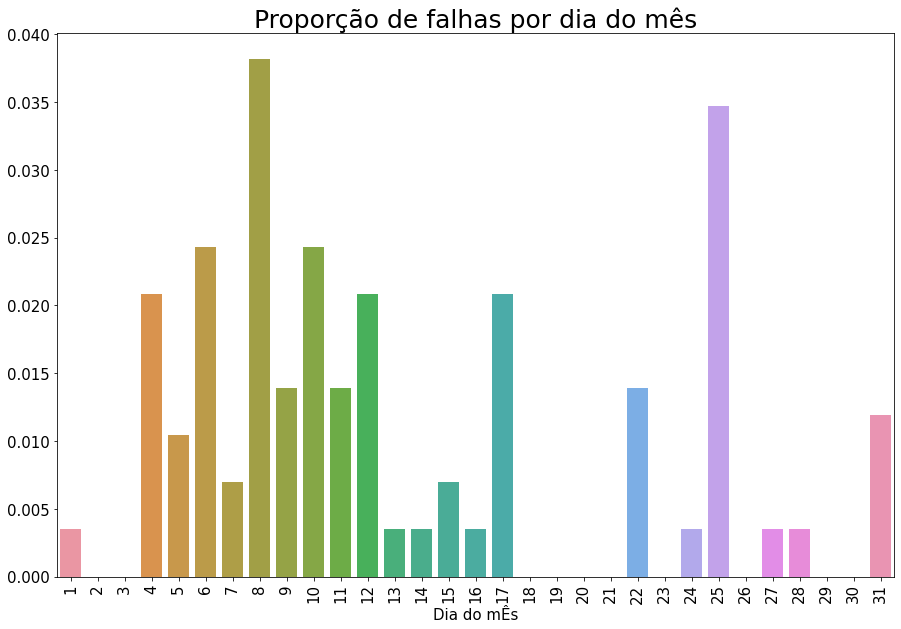

In [56]:
grouped_feature = df.groupby(by='﻿Date.day-of-month').mean()['Failure']
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=grouped_feature.index, y=grouped_feature.values)

plt.xlabel("Dia do mÊs", fontdict={"fontsize": AXIS_FONTSIZE})
plt.xticks(rotation=90, fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.title('Proporção de falhas por dia do mês', fontdict={'fontsize': 25})
plt.show()

In [17]:
df['Failure'].sum()
df[(df['﻿Date.day-of-month'] >= 4) & (df['﻿Date.day-of-month'] < 18)]['Failure'].sum()

61

Temos aqui visualmente a impressão de que a maioria das falhas se concenhra em um pedaço do mês. De fato temos 75% das falhas acontecendo em 50% do mÊs, mas por termos um número muito pequeno de ocorrências, fica perigoso afirmar que essa relação faça algum sentido prático, apesar de ser um bom ponto a se investigar.

### Operator

In [59]:
grouped_feature = df.groupby(by='Operator').mean()['Failure']
grouped_feature.sort_values()

Operator
Operator8    0.002049
Operator5    0.005123
Operator6    0.008197
Operator3    0.009221
Operator1    0.010246
Operator2    0.011270
Operator4    0.011270
Operator7    0.014344
Name: Failure, dtype: float64

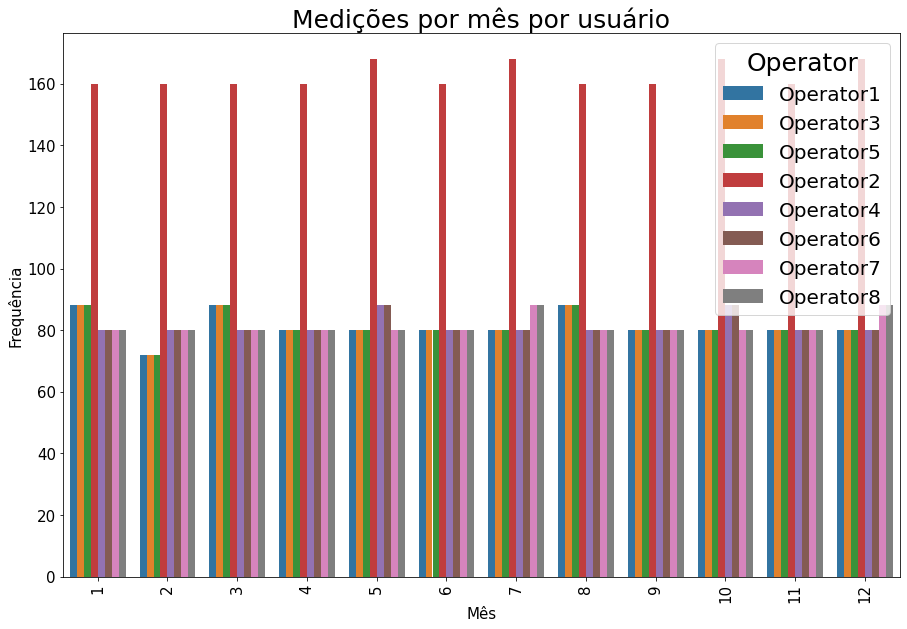

In [71]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x="﻿Date.month", data=df, hue='Operator')

plt.xlabel("Mês", fontdict={"fontsize": AXIS_FONTSIZE})
plt.xticks(rotation=90, fontsize=AXIS_FONTSIZE)
plt.ylabel("Frequência", fontdict={"fontsize": AXIS_FONTSIZE})
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.legend(title="Operator", fontsize=FONTSIZE, title_fontsize=TITLE_FONTSIZE, loc="upper right")
plt.title('Medições por mês por usuário', fontdict={'fontsize': 25})
plt.show()

Apesar de não ter ficao muito bonito o gráfico aponta a uniformidade das medições tanto na perspetiva do tempo quando do equilibrio entre os operadores. Há uma estranheza o operador 2 que tem exatamente o dobro das medidas que todos os outros e pode sugerir registros duplicados, mas depoisda limpeza do dataframe seguimos com a mesma distribuição. 

Levando o gráfico em consideração o gráfico, somos tentados a analisar a diferença na proporção de erros entre os dois que mais tiveram falhas e os dois que menos tiveram falhas. No primeiro momento nos parece apenas uma diferença de senioridade entre o operadores